# Import Required Libraries

In [17]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

import joblib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load PreProcessed Data

In [18]:
data = pd.read_csv(r"C:\Users\Deepak Verma\OneDrive\Documents\Loan_Default_Prediction\data\processed\loan_data_processed.csv")

In [19]:
data.head(5)

,no_of_dependents,education,self_employed,annual_income_in_lakhs,loan_amount_in_lakhs,loan_term_in_months,cibil_score,debt_to_income_ratio,Asset_Score_in_lakhs,loan_status
0,-0.294102,-0.995559,-1.007288,1.617979,1.633052,0.192617,0.000000,0.217956,0.930628,0
1,-1.473548,1.004461,0.992765,-0.341750,-0.324414,-0.508091,0.864508,-0.015446,-0.797198,1
2,0.295621,-0.995559,-1.007288,1.439822,1.610933,1.594031,0.864508,0.468454,1.289524,1
3,0.295621,-0.995559,-1.007288,1.119139,1.721525,-0.508091,0.864508,1.274879,1.033170,1
4,1.475067,1.004461,0.992765,1.689242,1.002681,1.594031,0.864508,-0.865631,1.151093,1


In [20]:
x = data.drop(columns = ["loan_status"], axis = 1)
y = data["loan_status"]

# Train and Ensemble Models

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

# Initialize Ensemble Models

In [22]:
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoosting': XGBClassifier(n_estimators=100, random_state=42)
}


Random Forest - Classification Report
              precision    recall  f1-score   support

           0       0.97      0.90      0.93      1846
           1       0.85      0.96      0.90      1142

    accuracy                           0.92      2988
   macro avg       0.91      0.93      0.92      2988
weighted avg       0.93      0.92      0.92      2988



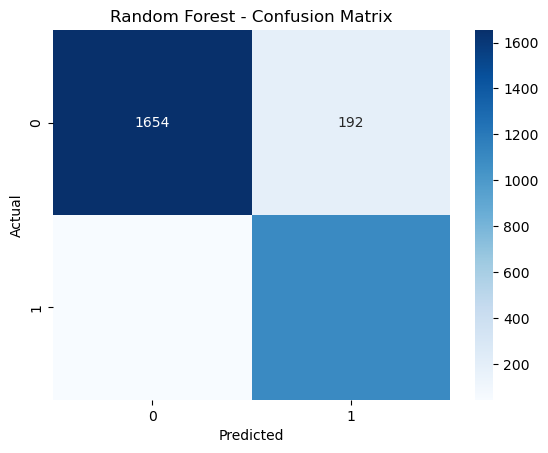


XGBoosting - Classification Report
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      1846
           1       0.85      0.91      0.88      1142

    accuracy                           0.90      2988
   macro avg       0.90      0.91      0.90      2988
weighted avg       0.91      0.90      0.90      2988



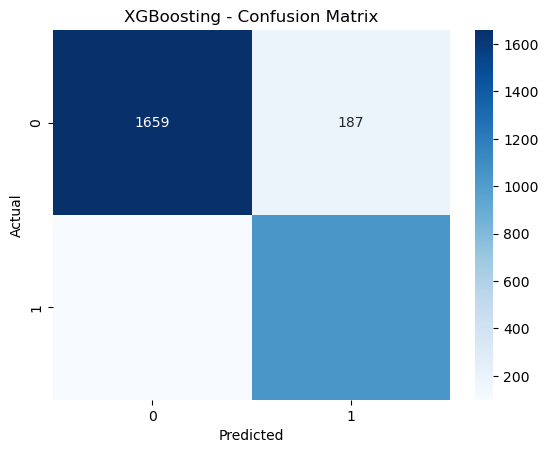

In [23]:
for name, model in models.items():
    model.fit(x_test, y_test)
    preds = model.predict(x_train)

    # Print performance metrics
    print(f"\n{name} - Classification Report")
    print(classification_report(y_train, preds))

    # Plot confusion matrix
    cm = confusion_matrix(y_train, preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.savefig(f"C:/Users/Deepak Verma/OneDrive/Documents/Loan_Default_Prediction/outputs/figures/{name}-Confusion_Matrix.png")
    plt.show()

# Cross Validation Accuracy

In [24]:
for name, model in models.items():
    scores = cross_val_score(model, x, y, cv=5)
    print(f"{name} - CV Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")

Random Forest - CV Accuracy: 0.9190 ± 0.0077
XGBoosting - CV Accuracy: 0.9047 ± 0.0056


# Save the Trained Models

In [25]:
joblib.dump(models["Random Forest"], r"C:\Users\Deepak Verma\OneDrive\Documents\Loan_Default_Prediction\models\rf_model.pkl")

['C:\\Users\\Deepak Verma\\OneDrive\\Documents\\Loan_Default_Prediction\\models\\rf_model.pkl']

In [26]:
joblib.dump(models["XGBoosting"], r"C:\Users\Deepak Verma\OneDrive\Documents\Loan_Default_Prediction\models\xgb_model.pkl")

['C:\\Users\\Deepak Verma\\OneDrive\\Documents\\Loan_Default_Prediction\\models\\xgb_model.pkl']